# Just an example.You can alter sample code anywhere. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import model
from  model import *
#import layer# import *

In [2]:
#Fix the random seed
np.random.seed(0)

## Load the training data and label

In [3]:
train_data = np.load('./data_ORI_name/train-imgs.npz')['arr_0']
train_label = np.load('./data_ORI_name/train-labels.npz')['arr_0']
test_data = np.load('./data_ORI_name/test-imgs.npz')['arr_0']



print("shape of train_data: {}".format(train_data.shape))
print("shape of train_label: {}".format(train_label.shape))
print("shape of test_data: {}".format(test_data.shape))


shape of train_data: (60000, 28, 28)
shape of train_label: (60000,)
shape of test_data: (10000, 28, 28)


## Show the training data

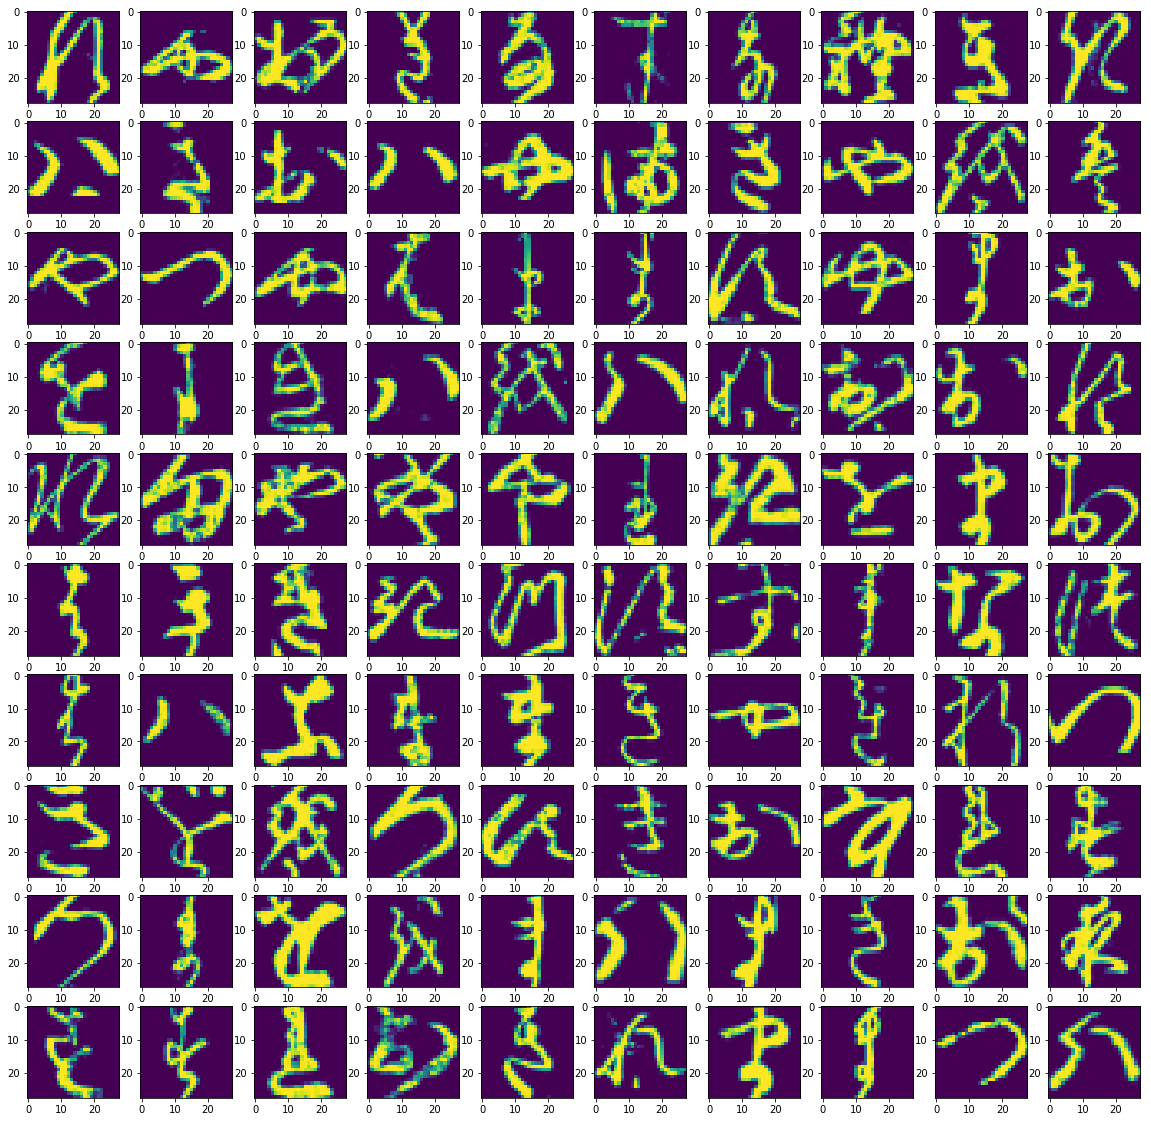

In [4]:
plt.figure(figsize=(20, 20))
for index in range(100):
    image = train_data[index]
    plt.subplot(10, 10, index+1)
    plt.imshow(image)
plt.show()

## Reshape the training and testing image

In [5]:
train_image_num = train_data.shape[0]
train_data = train_data.reshape(train_image_num, -1)

test_image_num = test_data.shape[0]
test_data = test_data.reshape(test_image_num, -1)

print("shape of train_data: {}".format(train_data.shape))
print("shape of train_label: {}".format(train_label.shape))
print("shape of test_data: {}".format(test_data.shape))


print("train_image_num  is : {}".format(train_image_num))
print("test_image_num   is : {}".format(test_image_num))

shape of train_data: (60000, 784)
shape of train_label: (60000,)
shape of test_data: (10000, 784)
train_image_num  is : 60000
test_image_num   is : 10000


In [6]:
val_image_num=10000

## Convert the training labels to one hot vector

In [7]:
label_temp = np.zeros((train_image_num, 10), dtype = np.float32)
for i in range(train_image_num):
    label_temp[i][train_label[i]] = 1
train_label_onehot = np.copy(label_temp)
print("One-hot training labels shape:",train_label_onehot.shape)


train_d=train_data[:50000]
val_d=train_data[50000:]
train_lo=train_label_onehot[:50000]
val_lo=train_label_onehot[50000:]
val_l=train_label[50000:]


One-hot training labels shape: (60000, 10)


## Hyperparameters

In [8]:
EPOCH = 120
Batch_size = 2000
Learning_rate = 0.001



In [9]:
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    return train_norm, test_norm

#train_data,test_data=prep_pixels(train_data,test_data)

In [10]:
import model.network as Model #,Batch_norm('bn1')
from model.layer import *
net = Model.Model([FullyConnected(784,100),Batch_norm('bn1'),Relu(),FullyConnected(100,100),Relu(),FullyConnected(100,50),Relu(),FullyConnected(50,50),Relu(), FullyConnected(50,10), Softmax()], CrossEntropy())

## Training

In [ ]:
train_batch_num = (train_image_num  -  val_image_num  )//Batch_size
val_batch_num = (val_image_num)//Batch_size
# test_batch_num = test_image_num//Batch_size

for epoch in range(1, EPOCH+1):
    
    if(epoch==50):
        Learning_rate=0.0001
    if(epoch==70):
        Learning_rate=0.00001
    if(epoch==90):
        Learning_rate=0.000001
    
    train_loss=0
    val_loss=0
    train_hit = 0
    val_hit = 0
    total_train_loss = 0
    total_val_loss = 0
    for it in range(train_batch_num):
        pred,lo = net.loss(train_d[it*Batch_size:(it+1)*Batch_size], train_lo[it*Batch_size:(it+1)*Batch_size])
        train_loss=lo.sum()
        #pred, train_loss = net.forward(train_data[it*Batch_size:(it+1)*Batch_size], train_label_onehot[it*Batch_size:(it+1)*Batch_size])
        
        pred_index = np.argmax(pred, axis=1)
      #  pred_test = net.forward(train_data[it*Batch_size:(it+1)*Batch_size])
      #  pred_index_test = np.argmax(pred_test, axis=1)
     #   for i in range(pred_index.shape[0]):
     #       if(pred_index[i]!=pred_index_test[i]):
     #           print('error')
        train_hit += (pred_index==train_label[it*Batch_size:(it+1)*Batch_size]).sum()
        total_train_loss += train_loss
        
        net.backward()
        #update#
        for layer in net.layers:
                if type(layer) == FullyConnected:
                    layer.weights -= Learning_rate * layer.grad_w
                    layer.biases -= Learning_rate * layer.grad_b
        #net.update(Learning_rate)
        
    for tit in range(val_batch_num):
       # tit=train_batch_num+titt
        pred,lo = net.loss(val_d[tit*Batch_size:(tit+1)*Batch_size], val_lo[tit*Batch_size:(tit+1)*Batch_size])#.sum()
        val_loss=lo.sum()
        #pred,val_loss += net.loss(train_data[tit*Batch_size:(tit+1)*Batch_size], train_label_onehot[tit*Batch_size:(tit+1)*Batch_size]).sum()
        #pred, val_loss = net.forward(train_data[tit*Batch_size:(tit+1)*Batch_size], train_label_onehot[tit*Batch_size:(tit+1)*Batch_size])
        pred_index = np.argmax(pred, axis=1)
        val_hit += (pred_index==val_l[tit*Batch_size:(tit+1)*Batch_size]).sum()
        total_val_loss += val_loss
        
    print('Epoch:%3d'%epoch, '|Train Loss:%8.4f'%(total_train_loss/train_batch_num), '|Train Acc:%3.4f'%(train_hit/(train_image_num-val_image_num)*100.0)
          , '|Val Loss:%8.4f'%(total_val_loss/val_batch_num), '|Val Acc:%3.4f'%(val_hit/val_image_num*100.0))
    #print(f'Epoch {epoch+1}/{EPOCH}: train loss = {total_train_loss/train_batch_num}, val loss = {total_val_loss/val_batch_num}')

## Dump for evaluation (upload your ML-test-predict.csv to kaggle )

In [ ]:
test_pred_list = []

for tit in range(test_image_num//Batch_size):
    pred = net.forward(test_data[tit*Batch_size:(tit+1)*Batch_size])
    pred_index = np.argmax(pred, axis=1)
    test_pred_list += pred_index.tolist()
    

print('Dump file...')
df = pd.DataFrame(test_pred_list, columns=["Category"])
df.to_csv('ML-test-predict.csv', index=True, index_label="Id")